# **Import Library yang dibutuhkan**

In [21]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV


# **Load Dataset**

In [22]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_RedDoorz_1.csv")
df.head()

,userName,score,at,content
0,Alfarizi Samania,5,2024-07-09 23:35:14,Good
1,Annas Kifayah,5,2024-07-09 17:27:11,Ok
2,Candra Kusmaidi,5,2024-07-09 17:14:21,Mudah
3,Intan Madhe,5,2024-07-09 15:59:19,Luar biasa 🫰🫰
4,Bambang Gunarto,5,2024-07-09 13:31:36,Sewa kamar yang terjangkau


In [23]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,Good
1,Ok
2,Mudah
3,Luar biasa 🫰🫰
4,Sewa kamar yang terjangkau
...,...
1995,Memudahan nyari hotel murah
1996,Mantul dh
1997,Saya merasa senang dan nyaman nginap di star h...
1998,Good


In [24]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [25]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content
count,2000
unique,1480
top,Ok
freq,83


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [26]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(2000, 1)

In [27]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [28]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [29]:
# Menghapus data yang kosong

df = df.dropna()

In [30]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content    0
dtype: int64

In [31]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(1480, 1)

In [32]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [33]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [34]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,cleaning
0,Good,good
1,Ok,ok
2,Mudah,mudah
3,Luar biasa 🫰🫰,luar biasa
4,Sewa kamar yang terjangkau,sewa kamar yang terjangkau
...,...,...
1993,Asik.... Ketika musim liburan tiba nginap di h...,asik ketika musim liburan tiba nginap di hotel...
1994,Harga terjangkau dan pasilitas cukup memuaskan...,harga terjangkau dan pasilitas cukup memuaskan...
1995,Memudahan nyari hotel murah,memudahan nyari hotel murah
1996,Mantul dh,mantul dh


# **Normalization**

In [35]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile",
        "bguss" : "bagus",
        "yyuy" : "",
        "sakarag" : "sekarang",
        "gbs" : "gabisa",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,Good,good,good
1,Ok,ok,ok
2,Mudah,mudah,mudah
3,Luar biasa 🫰🫰,luar biasa,luar biasa
4,Sewa kamar yang terjangkau,sewa kamar yang terjangkau,sewa kamar yang terjanggaau
...,...,...,...
1993,Asik.... Ketika musim liburan tiba nginap di h...,asik ketika musim liburan tiba nginap di hotel...,asik ketika musim liburan tiba nginap di hotel...
1994,Harga terjangkau dan pasilitas cukup memuaskan...,harga terjangkau dan pasilitas cukup memuaskan...,harga terjanggaau dan pasilitas cukup memuaska...
1995,Memudahan nyari hotel murah,memudahan nyari hotel murah,memudahan nyari hotel murah
1996,Mantul dh,mantul dh,mantul dh


# **Stopwords**

In [36]:
# Menginstall Library Sastrawi

!pip install Sastrawi

In [37]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dengan", "tidak", "aku", "engkau", "kamu", "beliau", "kalian", "kita", "sini", "situ", "sana",
                   "begini", "bapak", "ibu", "saudara", "tuan", "nyonya", "nona", "siapa", "apa", "mana", "kapan",
                   "bagaimana", "meski", "walaupun", "seandainya", "andai", "jikalau", "kini", "dulu", "sekarang",
                   "tadi", "besok", "lusa", "satu", "tiga", "pertama", "kedua", "ketiga", "sangat", "sekali", "terlalu",
                   "cukup", "lah", "tah", "yang", "nya", "untuk", "dan", "di", "ada", "saya", "ini", "banyak", "bisa", "ga",
                   "udah", "tapi", "sudah", "gak", "lagi", "sama", "lebih"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(more_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,Good,good,good,good
1,Ok,ok,ok,ok
2,Mudah,mudah,mudah,mudah
3,Luar biasa 🫰🫰,luar biasa,luar biasa,luar biasa
4,Sewa kamar yang terjangkau,sewa kamar yang terjangkau,sewa kamar yang terjanggaau,sewa kamar terjanggaau
...,...,...,...,...
1993,Asik.... Ketika musim liburan tiba nginap di h...,asik ketika musim liburan tiba nginap di hotel...,asik ketika musim liburan tiba nginap di hotel...,asik ketika musim liburan tiba nginap hotel di...
1994,Harga terjangkau dan pasilitas cukup memuaskan...,harga terjangkau dan pasilitas cukup memuaskan...,harga terjanggaau dan pasilitas cukup memuaska...,harga terjanggaau pasilitas memuaskan thx
1995,Memudahan nyari hotel murah,memudahan nyari hotel murah,memudahan nyari hotel murah,memudahan nyari hotel murah
1996,Mantul dh,mantul dh,mantul dh,mantul dh


# **Tokenize**

In [38]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,Good,good,good,good,[good]
1,Ok,ok,ok,ok,[ok]
2,Mudah,mudah,mudah,mudah,[mudah]
3,Luar biasa 🫰🫰,luar biasa,luar biasa,luar biasa,"[luar, biasa]"
4,Sewa kamar yang terjangkau,sewa kamar yang terjangkau,sewa kamar yang terjanggaau,sewa kamar terjanggaau,"[sewa, kamar, terjanggaau]"
...,...,...,...,...,...
1993,Asik.... Ketika musim liburan tiba nginap di h...,asik ketika musim liburan tiba nginap di hotel...,asik ketika musim liburan tiba nginap di hotel...,asik ketika musim liburan tiba nginap hotel di...,"[asik, ketika, musim, liburan, tiba, nginap, h..."
1994,Harga terjangkau dan pasilitas cukup memuaskan...,harga terjangkau dan pasilitas cukup memuaskan...,harga terjanggaau dan pasilitas cukup memuaska...,harga terjanggaau pasilitas memuaskan thx,"[harga, terjanggaau, pasilitas, memuaskan, thx]"
1995,Memudahan nyari hotel murah,memudahan nyari hotel murah,memudahan nyari hotel murah,memudahan nyari hotel murah,"[memudahan, nyari, hotel, murah]"
1996,Mantul dh,mantul dh,mantul dh,mantul dh,"[mantul, dh]"


# **Stemming**

In [39]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# df['steamming'] = df['tokenized'].apply(stemming)

# df['steamming'].to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_RedDoorz_1.csv', index = False)


In [40]:
df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_RedDoorz_1.csv', encoding = 'latin1')
df_steamming

,steamming
0,good
1,ok
2,mudah
3,luar biasa
4,sewa kamar jangkau
...,...
1475,asik ketika musim libur tiba nginap hotel di i...
1476,harga jangkau fasilitas muas thx
1477,mudah nyari hotel murah
1478,mantul dh


# **Translate**

In [41]:
# # Menginstall Library easynmt

# !pip install -U easynmt

In [42]:
# import pandas as pd
# from easynmt import EasyNMT

In [43]:
# # Load Data Hasil Stemming

# df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_RedDoorz_1.csv', encoding = 'latin1')


In [44]:
# # Menentukan Asal & Target Bahasa yang akan diterjemahkan

# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [45]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [46]:
# # Imputing NaN Values

# df_values = df_steamming.fillna(method = 'pad')
# df_values

In [47]:
# # Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

# df_values['steamming_en'] = df_values['steamming'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_RedDoorz_1.csv')

In [48]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_RedDoorz_1.csv', index_col=0)
df_values

,steamming,steamming_en
0,good,good
1,ok,Okay.
2,mudah,Easy.
3,luar biasa,Unbelievable.
4,sewa kamar jangkau,Rent your room.
...,...,...
1475,asik ketika musim libur tiba nginap hotel di i...,It's nice when the holiday comes to stay hotel...
1476,harga jangkau fasilitas muas thx,range price of thx muas facility
1477,mudah nyari hotel murah,It's easy to find a cheap hotel.
1478,mantul dh,mark dh


# **Labeling**

In [49]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_RedDoorz_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,good,good
1,ok,Okay.
2,mudah,Easy.
3,luar biasa,Unbelievable.
4,sewa kamar jangkau,Rent your room.
...,...,...
1475,asik ketika musim libur tiba nginap hotel di i...,It's nice when the holiday comes to stay hotel...
1476,harga jangkau fasilitas muas thx,range price of thx muas facility
1477,mudah nyari hotel murah,It's easy to find a cheap hotel.
1478,mantul dh,mark dh


In [50]:
# Menginstall Library Text-Blob, Worldcould

!pip install textblob
!pip install wordcloud

In [51]:
# Import Library yang dibutuhkan

from textblob import TextBlob


In [52]:
# Labeling With TextBlob

data_review = list(df_values['steamming_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 796
Netral = 502
Negatif = 182

Total Data Seluruhnya : 1480


In [53]:
# Melihat Status Sentimen

df_values['sentimen'] = status
df_values

,steamming,steamming_en,sentimen
0,good,good,Positif
1,ok,Okay.,Positif
2,mudah,Easy.,Positif
3,luar biasa,Unbelievable.,Negatif
4,sewa kamar jangkau,Rent your room.,Netral
...,...,...,...
1475,asik ketika musim libur tiba nginap hotel di i...,It's nice when the holiday comes to stay hotel...,Positif
1476,harga jangkau fasilitas muas thx,range price of thx muas facility,Netral
1477,mudah nyari hotel murah,It's easy to find a cheap hotel.,Positif
1478,mantul dh,mark dh,Netral


In [54]:
# Mengimplementasikan Variabel data_final

data_final = df_values
data_final

,steamming,steamming_en,sentimen
0,good,good,Positif
1,ok,Okay.,Positif
2,mudah,Easy.,Positif
3,luar biasa,Unbelievable.,Negatif
4,sewa kamar jangkau,Rent your room.,Netral
...,...,...,...
1475,asik ketika musim libur tiba nginap hotel di i...,It's nice when the holiday comes to stay hotel...,Positif
1476,harga jangkau fasilitas muas thx,range price of thx muas facility,Netral
1477,mudah nyari hotel murah,It's easy to find a cheap hotel.,Positif
1478,mantul dh,mark dh,Netral


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



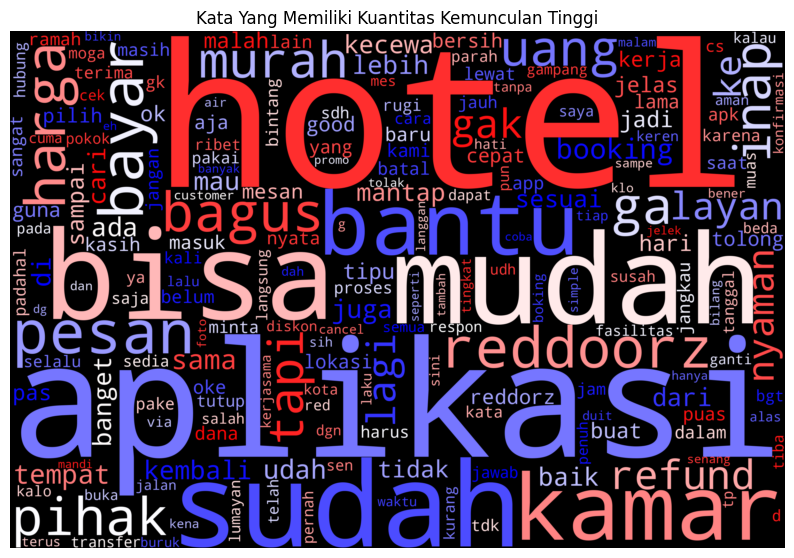

In [55]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in data_final['steamming']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


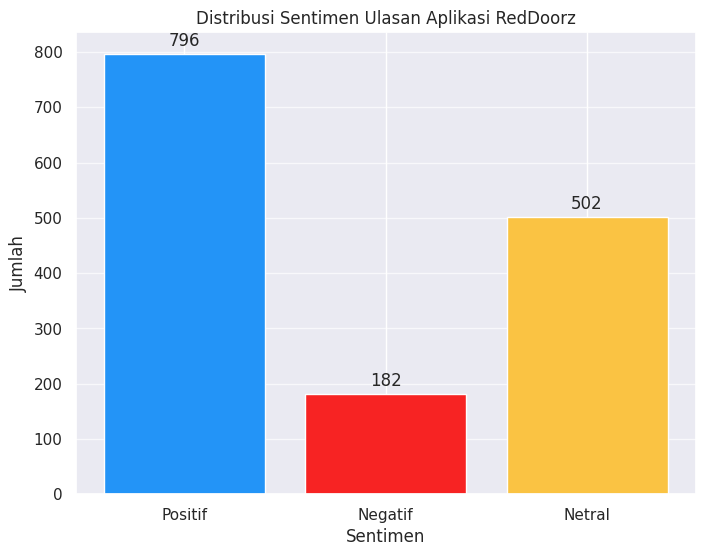

In [56]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi RedDoorz")


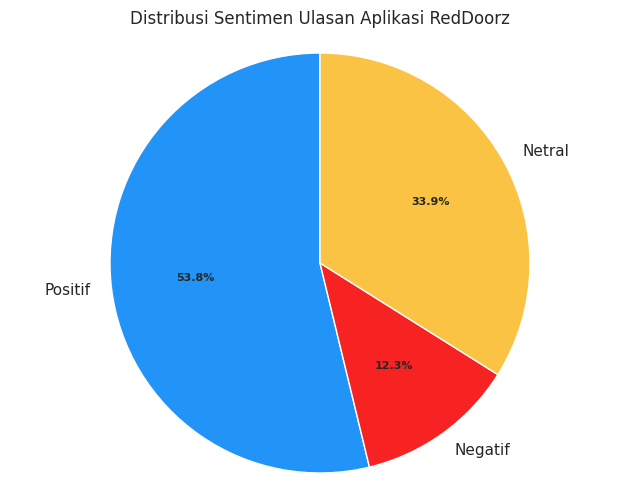

In [57]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi RedDoorz")

In [58]:
# Menghapus Sentimen Netral

data_final = data_final[data_final['sentimen'] != 'Netral']
data_final

,steamming,steamming_en,sentimen
0,good,good,Positif
1,ok,Okay.,Positif
2,mudah,Easy.,Positif
3,luar biasa,Unbelievable.,Negatif
5,sedikit susah guna saran di mudah saat liat pi...,It's a bit difficult to suggest. It's easy whe...,Negatif
...,...,...,...
1473,mohon maaf banget tapi tolong baca sudah pesan...,"fontcolor="" # FFFF00""I'msosorry fontcolor="" # ...",Negatif
1474,ntr kl jelek jadi bintang y,"And if you're ugly, you're a star.",Negatif
1475,asik ketika musim libur tiba nginap hotel di i...,It's nice when the holiday comes to stay hotel...,Positif
1477,mudah nyari hotel murah,It's easy to find a cheap hotel.,Positif


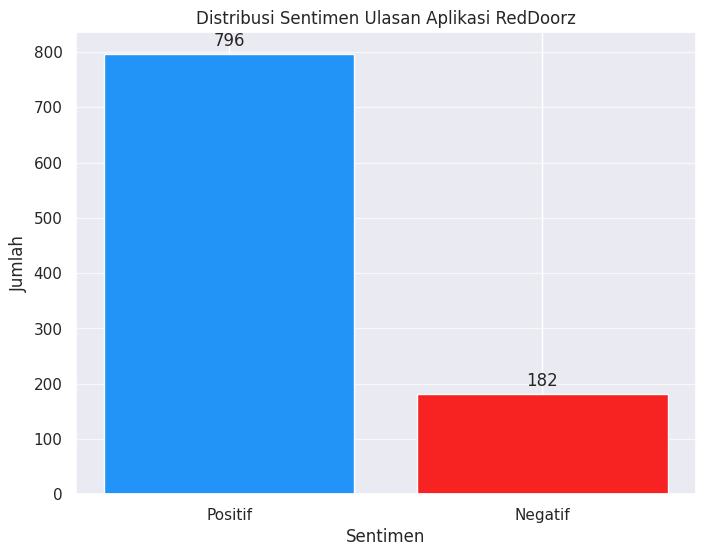

In [59]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi RedDoorz")


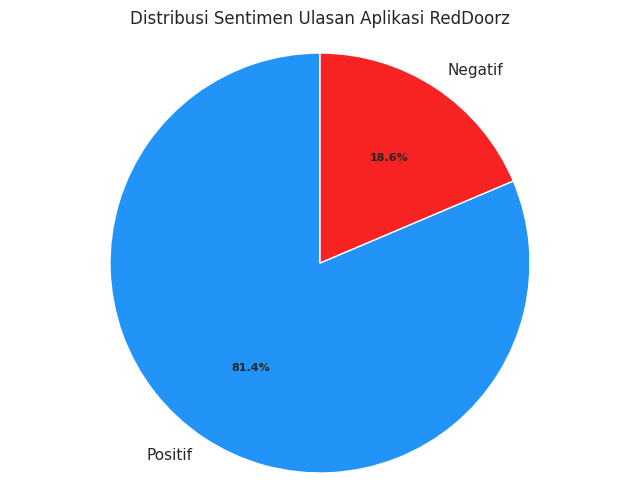

In [60]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi RedDoorz")

In [61]:
# Replace Data Sentimen

data_final = data_final.replace({'Positif':0, 'Negatif':1})
data_final

,steamming,steamming_en,sentimen
0,good,good,0
1,ok,Okay.,0
2,mudah,Easy.,0
3,luar biasa,Unbelievable.,1
5,sedikit susah guna saran di mudah saat liat pi...,It's a bit difficult to suggest. It's easy whe...,1
...,...,...,...
1473,mohon maaf banget tapi tolong baca sudah pesan...,"fontcolor="" # FFFF00""I'msosorry fontcolor="" # ...",1
1474,ntr kl jelek jadi bintang y,"And if you're ugly, you're a star.",1
1475,asik ketika musim libur tiba nginap hotel di i...,It's nice when the holiday comes to stay hotel...,0
1477,mudah nyari hotel murah,It's easy to find a cheap hotel.,0


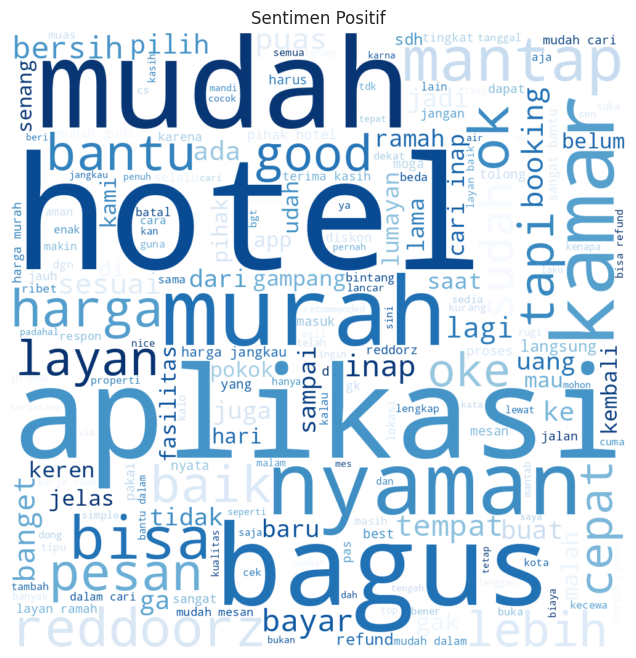

In [62]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data_final[data_final['sentimen'] == 0]
data_negatif = data_final[data_final['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['steamming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

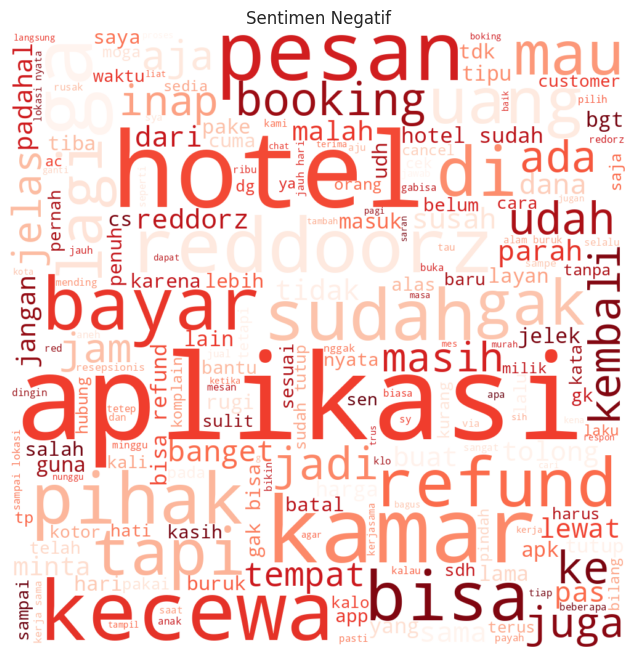

In [63]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['steamming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

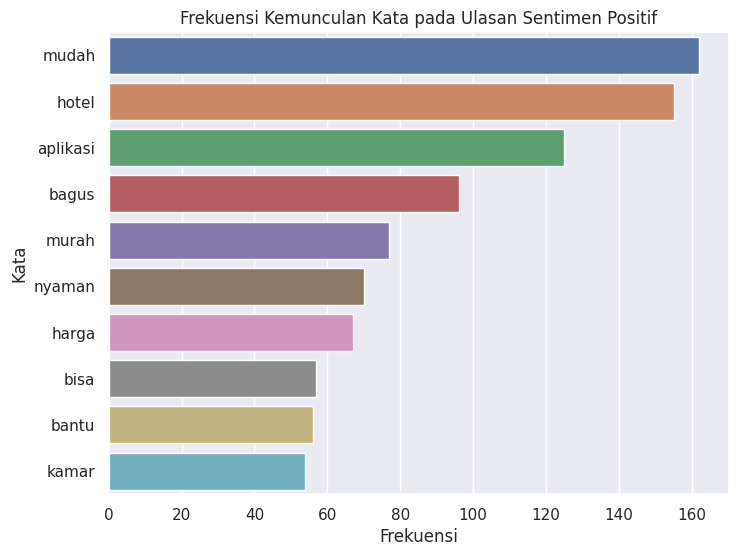

In [64]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data_final[data_final['sentimen'] == 0]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [65]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

    kata  frekuensi
   mudah        162
   hotel        155
aplikasi        125
   bagus         96
   murah         77
  nyaman         70
   harga         67
    bisa         57
   bantu         56
   kamar         54


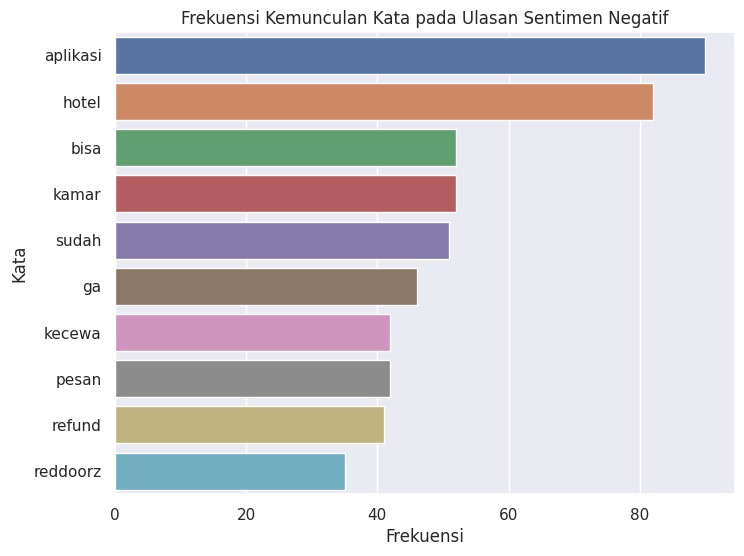

In [66]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data_final[data_final['sentimen'] == 1]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [67]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

    kata  frekuensi
aplikasi         90
   hotel         82
    bisa         52
   kamar         52
   sudah         51
      ga         46
  kecewa         42
   pesan         42
  refund         41
reddoorz         35


In [68]:
# Menghitung Jumlah Sentimen Positif, Negatif

data_final['sentimen'].value_counts()

sentimen
0    796
1    182
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [69]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data_final['steamming']
y = data_final['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [70]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [71]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

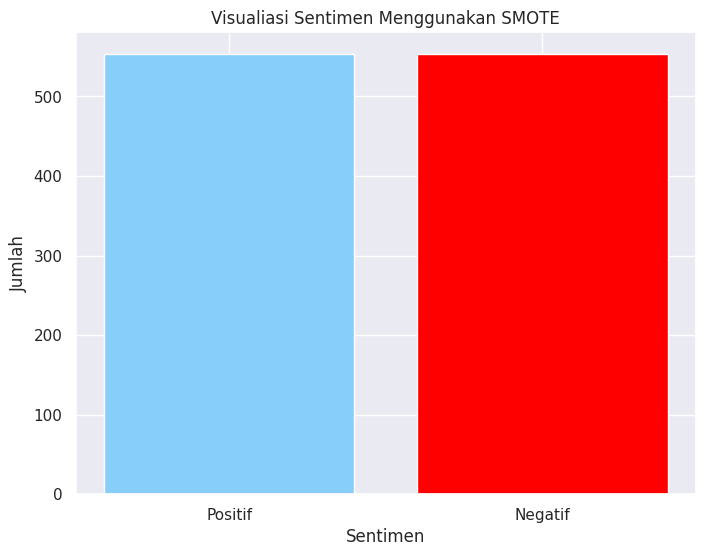

In [72]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [73]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [74]:
X_train_resampled.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
# Membangun Model Support vector Machine

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_resampled, y_train_resampled)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.8707482993197279
Akurasi untuk c = 0.05: 0.8843537414965986
Akurasi untuk c = 0.25: 0.8979591836734694
Akurasi untuk c = 0.5: 0.8877551020408163
Akurasi untuk c = 0.75: 0.8843537414965986
Akurasi untuk c = 1: 0.8809523809523809


In [76]:
# Menginisialisasi classifier SVM linier,
# membungkusnya dengan model kalibrasi untuk meningkatkan prediksi probabilitasnya,
# dan kemudian melatih model gabungan tersebut pada data pelatihan.

linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [77]:
# Final Accuracy Score Model

print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.8809523809523809 


In [78]:
# Classification Report

from sklearn.metrics import confusion_matrix

# Evaluasi Model
y_pred = svm.predict(X_test_vec)
print('Akurasi Model Support Vector Machine : {:.4f}' .format(svm.score(X_test_vec, y_test)))

print("\nLaporan Klasifikasi :\n", classification_report(y_test, y_pred))

Akurasi Model Support Vector Machine : 0.8810

Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       243
           1       0.65      0.69      0.67        51

    accuracy                           0.88       294
   macro avg       0.79      0.80      0.80       294
weighted avg       0.88      0.88      0.88       294



In [79]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[224  19]
 [ 16  35]]

True Positives (TP) =  224

True Negatives (TN) =  35

False Positives (FP) =  19

False Negatives (FN) =  16

Accuracy =  0.8809523809523809


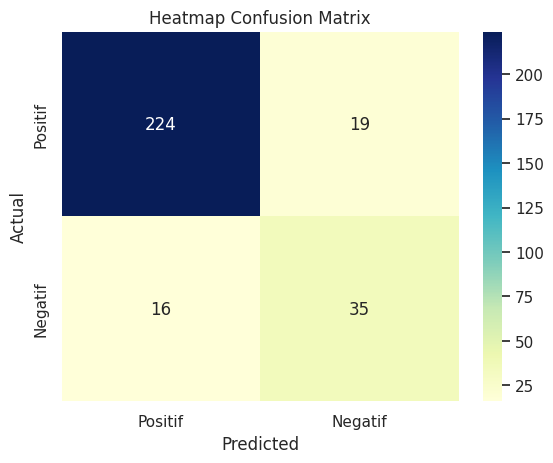

In [80]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif', 'Negatif'],
                         index=['Positif', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [81]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [82]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8810


In [83]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1190


# **Testing**

In [84]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Aplikasi yg bagus. Sangat membantu sekali dalam mencari penginapan aaat keluar kota. Memilih penginapannya pun juga mudah. Bisa mencari lokasi di tempat terdekat yg kita tentukan
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 88.35%
Probabilitas: 88.35120390477329 %


In [85]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Pengalaman terburuk saya memesan di aplikasi reddoorz di Pangandaran. Saya sudah pesan dan sudah bayar melalu m-banking. Tapi ketika datang kelokasi harus bayar lagi seharga 1 kamar hotel. Kata pemilik nya sudah lama tidak pernah di bayar sama reddoorz. Setiap orang yang pesan pasti masuk nya ke pihak aplikasi dan tak di bayarkan ke pemilik hotel. Tolong ini di tindak lanjuti, kasian pemilik hotel dan customer.
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 90.61%
Probabilitas: 90.61473587812505 %
